# Sectoral economics 

#### Calculation and interpretation of Nominal and Real Effective Exchange Rates
**1rst assignment, Group 8**

***Bachelor degree in Economics. Autonomous University of Barcelona***

***Professor Dr. Javier Asencio***

***By, Roylan Martinez Vargas NIU 1539069***




#### a) Compute the Nominal Effective Exchange Rates of the Spanish economy with respect to the France, Germany, the UK and Sweden for the period 2000-2019. 

Before anything else, I will compact the data I am interested in:

In [81]:
import pandas as pd
wtable = pd.read_excel('a37wghts.xls', 'A37W2016', index_col=0)
nomtable = pd.read_csv('amecoSerie.txt', sep=',', index_col=0)
w = wtable.loc['Spain', ['United_Kingdom', 'Germany', 'France', 'Sweden']]
w = w.apply(lambda x: x/w.sum())
n = nomtable.loc[['United Kingdom', 'Germany', 'France', 'Sweden'], '1995':'2019']
for year in range(1995, 2000):
    if type(n[str(year)][0]) is str:
        n[str(year)] = n[str(year)].apply(lambda notint: float(notint.strip()))
print('Trade weight 2016 (w)\n', w, '\n\n')
print('Nominal exchange rates (n)\n', n[['2000', '2019']])

Trade weight 2016 (w)
 United_Kingdom    0.215721
Germany           0.372366
France            0.379897
Sweden            0.032016
Name: Spain, dtype: float64 


Nominal exchange rates (n)
                     2000       2019
Country                            
United Kingdom  0.609478   0.882156
Germany         1.000000   1.000000
France          1.000000   1.000000
Sweden          8.445188  10.632524


The **Trade weight 2016 (w)** is a series that contains the Spanish *trade weight* with the **United Kingdom**, **Germany**, **France** and **Sweden** in **2016** and the **Nominal Exchange Rates (n)** is a table that contains the *Nominal exchange rates* with the same countries, therefore we are able to compute the **Nominal Effective Exchange Rate** for **2000** and **2019**: 

In [82]:
def neer_func(time):
    return (((n.loc['United Kingdom'][time] / n.loc['United Kingdom']['2000']) ** w[0]) * ((n.loc['Germany'][time] / n.loc['Germany']['2000']) ** w[1]) * ((n.loc['France'][time] / n.loc['France']['2000']) ** w[2]) * ((n.loc['Sweden'][time] / n.loc['Sweden']['2000']) ** w[3])) * 100
print(neer_func('2019'), 100 - neer_func('2019'))

109.10498445030821 -9.104984450308208


Finally, under a *monotonic evolution* assumption of the **Nominal Effective Exchange Rate** series and a **Trade weight share of 2016**, it takes a **NEER** value of **109.10498445030821** with a competitiveness deterioration of **9.104984450308208** for **Spain** with respect of the **UK, Germany, France** and **Sweden**. \linebreak

#### b) Compute the Real Effective Exchange Rate for Spain against the same countries, in terms the Consumer Price Index: REER (CPI). \linebreak

Before anything else, I will compact the data I am interested in:

In [83]:
t = pd.read_csv('amecoSerie (2).txt', sep=',', index_col='Country')
rtable = t.loc[['Spain', 'United Kingdom', 'Germany', 'France', 'Sweden'], '1995':'2019']
for year in range(1995, 2020):
    if type(rtable[str(year)][0]) is str:
        rtable[str(year)] = rtable[str(year)].apply(lambda notint: float(notint.strip()))
print('Consumer Price Index (2015 = 100)\n', rtable[['2000', '2019']])

Consumer Price Index (2015 = 100)
                      2000        2019
Country                              
Spain           71.215000  104.394021
United Kingdom  72.691667  107.871717
Germany         78.933333  105.415409
France          78.226667  104.975385
Sweden          79.778333  106.858669


Since the above data has its base in **2015**, it is necessary to make the **2000** as the new base year.

In [84]:
rtable = rtable.divide(rtable['2000'], axis=0) * 100
print('Consumer Price Index (2000 = 100)\n', rtable[['2000', '2019']])

Consumer Price Index (2000 = 100)
                  2000        2019
Country                          
Spain           100.0  146.589934
United Kingdom  100.0  148.396263
Germany         100.0  133.549928
France          100.0  134.193862
Sweden          100.0  133.944474


Now, it is just missing to compute the **Real Effective Exchange Rate**:

In [85]:
def reer_func(time):
    return ((rtable.loc['Spain', time] / rtable.loc['Spain', '2000']) / (((rtable.loc['United Kingdom', time] / rtable.loc['United Kingdom', '2000']) ** w[0]) * ((rtable.loc['Germany', time] / rtable.loc['Germany', '2000']) ** w[1]) * ((rtable.loc['France', time] / rtable.loc['France', '2000']) ** w[2]) * ((rtable.loc['Sweden', time] / rtable.loc['Sweden', '2000']) ** w[3]))) * neer_func(time)
print(reer_func('2019'), 100 - reer_func('2019'), (100 - reer_func('2019')) - (100 - neer_func('2019')))

116.84090771655362 -16.840907716553616 -7.735923266245408


The **Real Effective Exchange Rate** of **Spain** against the **United Kingdom**, **Germany**, **Sweden** and **France** for the years **2000** and **2019** is of **116.84090771655362** with a competitiveness deterioration of **16.840907716553616** and therefore with a **worsed competitiveness loss** than the **NEER**, with a difference of **7.735923266245408**. \linebreak

#### c) Plot the evolution of NEER and REER (CPI) against time and write your own interpretation of its meaning

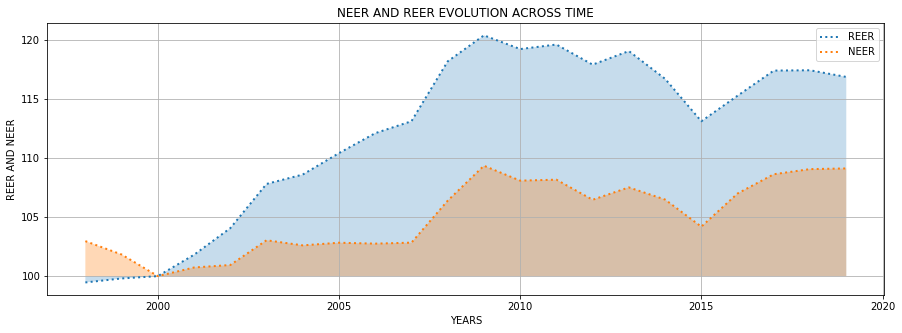

In [86]:
import matplotlib.pyplot as plt 
neerS, reerS , year = [], [], []
for series in range(1998,2020):
    neerS.append(neer_func(str(series)))
    reerS.append(reer_func(str(series)))
    year.append(series)
finalt = pd.DataFrame({'neer':neerS, 'reer':reerS})
plt.plot(year, finalt['reer'], ':',linewidth=2, label='REER')
plt.plot(year, finalt['neer'], ':',linewidth=2, label='NEER')
plt.fill_between(year, finalt['reer'], 100, alpha=0.25)
plt.fill_between(year, finalt['neer'], 100, alpha=0.30)
plt.grid()
plt.legend()
plt.xlabel('YEARS')
plt.ylabel('REER AND NEER')
plt.title('NEER AND REER EVOLUTION ACROSS TIME')
plt.show()

The **NEER** and **REER** evolution across time have significantly diverged across time. They both have a strong correlation with the each other, however the **NEER** has overall lower values; up to a divergence of **7.735923266245408** in 2019 (in comparisson with the **NEER**).\linebreak
The increasing values of the **NEER** and **REER** overall can be argued to be due to a higher depreciation rate by the other countries currencies in contrast with the **Spain euro** depreciation rate patern. In the other hand, the overall higher values of the **REER** in comparisson with the **NEER** can be explained by a higher inflation patern in **Spain** in comparisson with the other countries in a *side by side* comparisson while keeping constant the **NEER** changes.